In [9]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.stats import norm
from experiment import ResultsFile
from evaluation import test_colour_model
import numpy as np
import matplotlib
from colour_dict import colour_dict
from evaluation import name_to_rgb
import numpy as np
from prob_model import ColourModel, NeuralColourModel
import random
import copy

In [42]:
n=1
colours = np.array(list((map(name_to_rgb, colour_dict['blue']))))
d = list(zip(np.repeat(colours[:,0], n), np.repeat(colours[:,1], n), np.repeat(colours[:,2], n)))
a = copy.copy(d)
random.shuffle(a)

{'tp': 9, 'fp': 2, 'fn': 0, 'tn': 31}


<IPython.core.display.Javascript object>


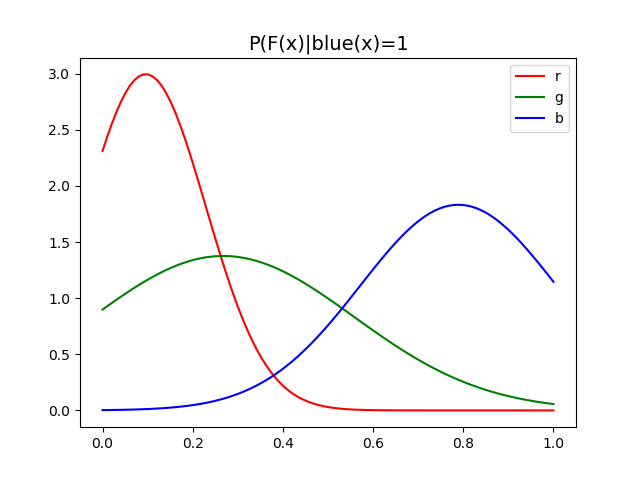

In [45]:
mu_r, sigma_r = norm.fit(np.repeat(colours[:,0], n))
mu_g, sigma_g = norm.fit(np.repeat(colours[:,1], n))
mu_b, sigma_b = norm.fit(np.repeat(colours[:,2], n))
true_mu = (mu_r, mu_g, mu_b)
true_sigma = (sigma_r, sigma_g, sigma_b)
cm = ColourModel('blue', mu0=true_mu, sigma0=true_sigma)
print(test_colour_model(cm, colour_thresh=0.5))
cm.draw()

{'tp': 9, 'fp': 3, 'fn': 0, 'tn': 30}


<IPython.core.display.Javascript object>


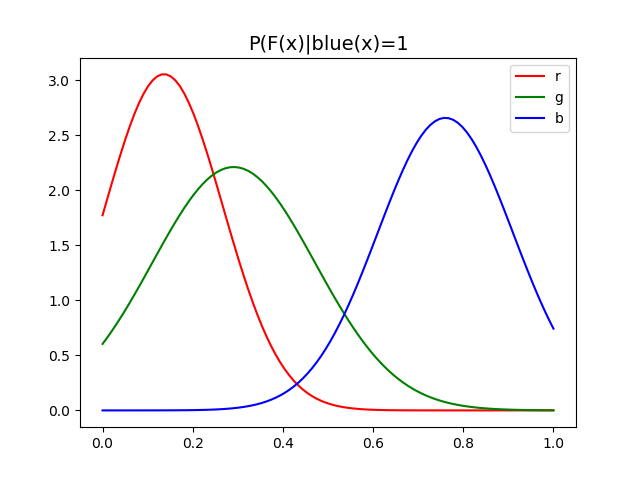

In [43]:
cm2 = ColourModel('blue')
for data in a:
    cm2.update(fx=data, w=1)

print(test_colour_model(cm2))
cm2.draw()

{'tp': 9, 'fp': 3, 'fn': 0, 'tn': 30}


<IPython.core.display.Javascript object>


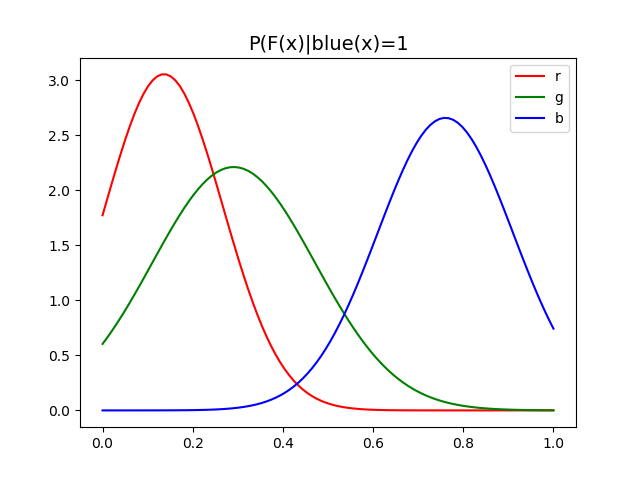

In [44]:
cm22 = ColourModel('blue')
for data in d:
    cm22.update(fx=data, w=1)

print(test_colour_model(cm22))
cm22.draw()

{'tp': 0, 'fp': 0, 'fn': 9, 'tn': 33}


<IPython.core.display.Javascript object>


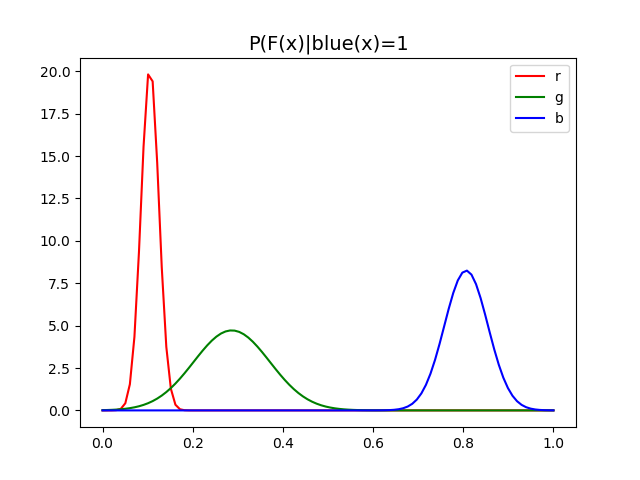

In [13]:
cm3 = ColourModel('blue')
for data in a:
    cm3.update2(fx=np.array(data), w=1)

print(test_colour_model(cm3))
cm3.draw()

{'tp': 1, 'fp': 0, 'fn': 8, 'tn': 33}


<IPython.core.display.Javascript object>


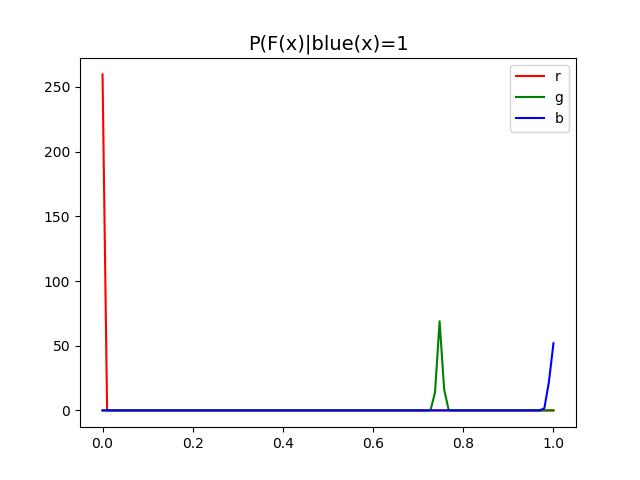

In [14]:
cm4 = ColourModel('blue')
for data in d:
    cm4.update2(fx=np.array(data), w=1)

print(test_colour_model(cm4))
cm4.draw()

In [15]:
cm5 = NeuralColourModel('blue')
for data in d:
    cm5.update(fx=np.array(data), w=1)

print(test_colour_model(cm5))
#cm5.draw()

{'tp': 9, 'fp': 33, 'fn': 0, 'tn': 0}
